<a href="https://colab.research.google.com/github/MustafaBasit521/-Student-Score-Prediction/blob/main/student_score_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Student Score Prediction - Linear Regression
This notebook demonstrates a **baseline Linear Regression model** to predict students' exam scores based on study hours.

In [1]:

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Loading The Data Set

In [5]:

# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/StudentPerformanceFactors.csv")
print(df.head())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

# Data Cleaning & Preprocessing

In [6]:

# Fill missing values with mean
df.fillna({
    'Hours_Studied': df['Hours_Studied'].mean(),
    'Exam_Score': df['Exam_Score'].mean()
}, inplace=True)

# Drop duplicates
df.drop_duplicates(subset=['Hours_Studied'], inplace=True)
df.drop_duplicates(subset=['Exam_Score'], inplace=True)

# Convert types
df['Hours_Studied'] = df['Hours_Studied'].astype(int)
df['Exam_Score'] = df['Exam_Score'].astype(int)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 2035
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               17 non-null     int64 
 1   Attendance                  17 non-null     int64 
 2   Parental_Involvement        17 non-null     object
 3   Access_to_Resources         17 non-null     object
 4   Extracurricular_Activities  17 non-null     object
 5   Sleep_Hours                 17 non-null     int64 
 6   Previous_Scores             17 non-null     int64 
 7   Motivation_Level            17 non-null     object
 8   Internet_Access             17 non-null     object
 9   Tutoring_Sessions           17 non-null     int64 
 10  Family_Income               17 non-null     object
 11  Teacher_Quality             17 non-null     object
 12  School_Type                 17 non-null     object
 13  Peer_Influence              17 non-null     object
 14 

# Chosing Features And Targets

In [7]:

# Features and Target
X = df[['Hours_Studied']]
y = df['Exam_Score']



# Scaling the Data

In [8]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Visualization of Data

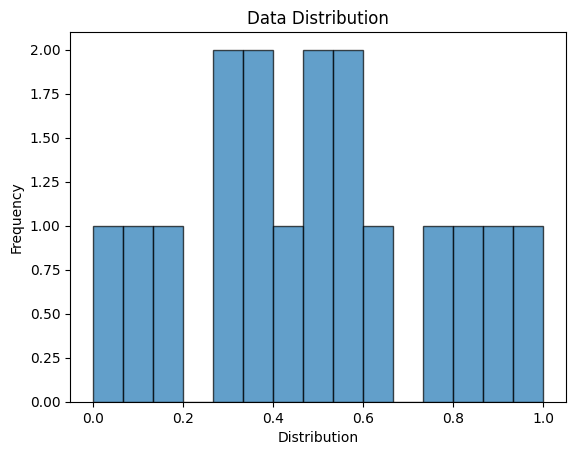

In [9]:
# Histogram-Visualization

plt.hist(X_scaled,bins=15,edgecolor='black',alpha=0.7)
plt.title("Data Distribution")
plt.xlabel("Distribution")
plt.ylabel("Frequency")
plt.show()


# Splitting the Data

In [10]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Training The Data

In [11]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Predictions

In [12]:
# Predictions
y_pred = model.predict(X_test)

# Comparing Actual and Predicted Data

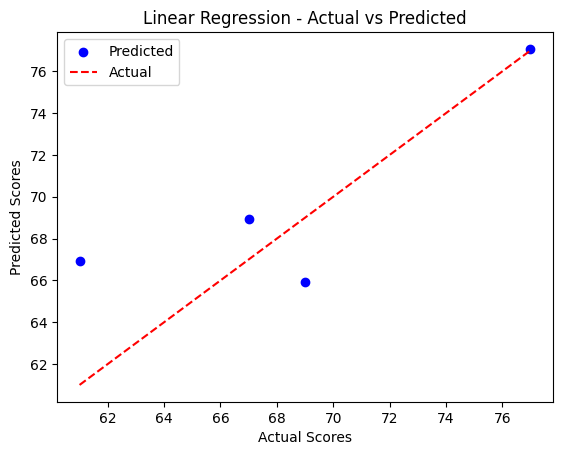

In [13]:

# Visualization
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Actual')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.legend()
plt.title("Linear Regression - Actual vs Predicted")
plt.show()


In [14]:

# Evaluation Metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


MAE: 2.76
MSE: 12.11
R² Score: 0.63
